In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_pickle('ExG Shot Data')

In [4]:
df.head()

,statsbomb_xg,first_time,one_on_one,aerial_won,open_goal,deflected,saved_to_post,saved_off_target,redirect,follows_dribble,technique,body_part,type,outcome,location
0,0.082942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,Left Foot,Free Kick,Goal,"[94.7, 41.1]"
1,0.165576,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,Right Foot,Open Play,Saved,"[114.2, 50.8]"
2,0.405518,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,Right Foot,Open Play,Saved,"[116.2, 45.7]"
3,0.112382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,Right Foot,Open Play,Blocked,"[107.1, 35.4]"
4,0.040309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,Left Foot,Free Kick,Off T,"[96.3, 24.5]"


In [5]:
df.shape

(12003, 15)

In [6]:
#loop through the location column extract each x and y coordinate, assign it to the specific column.

x_shot = [i[0] for i in df["location"]]
df['shot_x_coordinate'] = pd.DataFrame(x_shot)

y_shot = [i[1] for i in df['location']]
df['shot_y_coordinate'] = pd.DataFrame(y_shot)

#calculating the distances between the location of shots and the centre of the goal.

df['shot_distance'] = round(np.sqrt((120-df['shot_x_coordinate'])**2 + (40-df['shot_y_coordinate']) **2), 1)

#calculating the angles of the shots by using arctan

df['shot_angle'] = np.arctan2(df['shot_y_coordinate'], df['shot_x_coordinate'])
df['shot_angle'] = round(np.degrees(df['shot_angle']), 1)

In [7]:
#creating a column "is_goal"

is_goal = []

for x in df['outcome']:
    
    if x == 'Goal':
        is_goal.append('Goal')
    
    else:
        is_goal.append('Not Goal')
        
df['is_goal'] = pd.DataFrame(is_goal) 

#assign dummy variables 

df.fillna(0, inplace=True)
df.replace(True, 1, inplace=True)

In [8]:
df['is_goal_bool'] = df['is_goal'].map({"Goal":1, "Not Goal":0})

In [9]:
df["body_part"].unique()

array(['Left Foot', 'Right Foot', 'Head', 'Other'], dtype=object)

In [10]:
#renewing the colum "body_part",  

body_part_name = []

for x in df['body_part']:
    
    if (x == 'Left Foot') or (x=='Right Foot'):
        body_part_name.append('Foot')
        
    elif x == 'Head':
        body_part_name.append('Head')
    
    else:
        body_part_name.append('Other')

df['body_part'] = pd.DataFrame(body_part_name)

In [11]:
technique_name = []

for x in df['technique']:
    
    if (x=='Volley') or (x== 'Half Volley'):
        technique_name.append('Volley')
    
    elif x=='Overhead Kick':
        technique_name.append('Volley')
        
    else:
        technique_name.append('Normal')
        
df['technique'] = pd.DataFrame(technique_name)

In [12]:
df['body_part'].value_counts()

Foot     10467
Head      1508
Other       28
Name: body_part, dtype: int64

In [13]:
df['technique'].value_counts()

Normal    10100
Volley     1903
Name: technique, dtype: int64

In [14]:
df['type'].value_counts()

Open Play    10932
Free Kick      918
Penalty        152
Corner           1
Name: type, dtype: int64

In [15]:
df['outcome'].value_counts()

Off T               3768
Saved               3123
Blocked             2692
Goal                1645
Wayward              371
Post                 329
Saved Off Target      49
Saved to Post         26
Name: outcome, dtype: int64

In [16]:
df.columns

Index(['statsbomb_xg', 'first_time', 'one_on_one', 'aerial_won', 'open_goal',
       'deflected', 'saved_to_post', 'saved_off_target', 'redirect',
       'follows_dribble', 'technique', 'body_part', 'type', 'outcome',
       'location', 'shot_x_coordinate', 'shot_y_coordinate', 'shot_distance',
       'shot_angle', 'is_goal', 'is_goal_bool'],
      dtype='object')

## Data Visualisation

In [17]:
#creating a function that makes a half of a football pitch. pitch size was defined as 120x80m. 

def draw_half_pitch_vertical(ax):
    

    plt.plot([0,0],[120,60], color="black")
    plt.plot([0,80],[120,120], color="black")
    plt.plot([80,80],[120,60], color="black")

    plt.plot([19.85, 19.85], [120, 103.5], color='black')
    plt.plot([60.15, 60.15], [120, 103.5], color='black')
    plt.plot([19.85, 60.15], [103.5, 103.5], color='black')

    plt.plot([49.16, 49.16], [120, 114.5], color='black')
    plt.plot([30.84, 30.84], [120, 114.5], color='black')
    plt.plot([30.84, 49.16], [114.5, 114.5], color='black')

    Penalty_Spot = plt.Circle((40, 109), 0.3, color='black')

    ax.add_patch(Penalty_Spot)
    
    plt.axis('off')

C:\Users\Shuhei\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


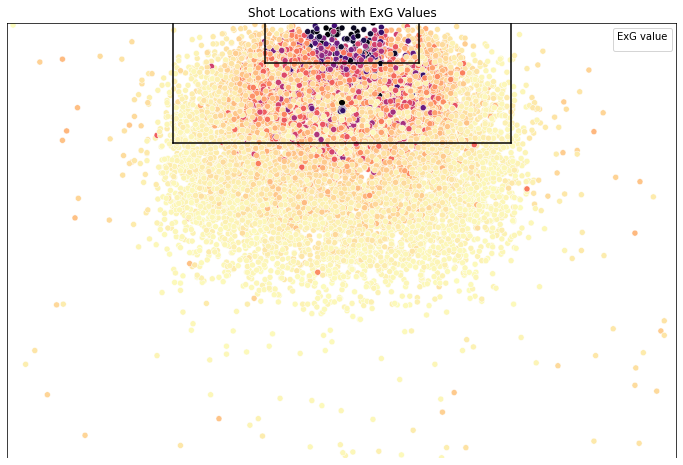

In [18]:
#plotting shot locations hued by statsbomb_xg.

fig=plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
draw_half_pitch_vertical(ax)


sns.scatterplot(df['shot_y_coordinate'], df['shot_x_coordinate'], hue=df['statsbomb_xg'], palette='magma_r', alpha=1, legend=False)

plt.title('Shot Locations with ExG Values')
plt.xlim((0, 80))
plt.ylim((60, 120))
plt.legend(title='ExG value')

In [19]:
#command for saving the figure
fig.savefig('ExG Map updated.png', format='png', dpi=1200)

## Preparation for Modeling

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
#create a new df dropping unnecessary columns
df_selected = df.drop(['location', 'shot_x_coordinate', 'shot_y_coordinate', 'is_goal', 'outcome'], axis=1)

#extract columns with boolean values
booled = ['first_time', 'one_on_one', 'aerial_won', 'open_goal','deflected', 'saved_to_post', 'saved_off_target', 'redirect','follows_dribble']

#extract numerical columns
numerical = ['shot_distance', 'shot_angle']

#extract categorical columns
categorical = [x for x in df_selected.columns if x not in numerical + booled+ ['statsbomb_xg', 'is_goal_bool']]

#assign dummy variables to the categorical columns 
dummy_cat = pd.get_dummies(data = df_selected, columns = categorical, drop_first=True)

#apply scaling to numerical columns and assign the result to scaled_numerical
scaler = StandardScaler()

scaled_numerical = scaler.fit_transform(df_selected[numerical])

scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical)

In [22]:
dummy_cat

,statsbomb_xg,first_time,one_on_one,aerial_won,open_goal,deflected,saved_to_post,saved_off_target,redirect,follows_dribble,shot_distance,shot_angle,is_goal_bool,technique_Volley,body_part_Head,body_part_Other,type_Free Kick,type_Open Play,type_Penalty
0,0.082942,0,0,0,0,0,0,0,0,0,25.3,23.5,1,0,0,0,1,0,0
1,0.165576,1,0,0,0,0,0,0,0,0,12.3,24.0,0,0,0,0,0,1,0
2,0.405518,1,0,0,0,0,0,0,0,0,6.9,21.5,0,0,0,0,0,1,0
3,0.112382,0,0,0,0,0,0,0,0,0,13.7,18.3,0,0,0,0,0,1,0
4,0.040309,0,0,0,0,0,0,0,0,0,28.3,14.3,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11998,0.082145,0,0,0,0,0,0,0,0,0,19.4,15.5,0,0,0,0,0,1,0
11999,0.085953,0,0,0,0,0,0,0,0,0,12.1,19.2,0,0,1,0,0,1,0
12000,0.192398,1,0,0,0,0,0,0,0,0,10.4,20.4,0,1,0,0,0,1,0
12001,0.014248,1,0,0,0,0,0,0,0,0,29.4,28.1,0,0,0,0,0,1,0


In [23]:
#drop the old numerical columns so that the new scaled columns can be merged with the categorical columns
dummy_cat = dummy_cat.drop(columns=numerical, axis=1)

df_final = dummy_cat.merge(right=scaled_numerical, how='left', left_index=True, right_index=True)

In [24]:
df_final.columns

Index(['statsbomb_xg', 'first_time', 'one_on_one', 'aerial_won', 'open_goal',
       'deflected', 'saved_to_post', 'saved_off_target', 'redirect',
       'follows_dribble', 'is_goal_bool', 'technique_Volley', 'body_part_Head',
       'body_part_Other', 'type_Free Kick', 'type_Open Play', 'type_Penalty',
       'shot_distance', 'shot_angle'],
      dtype='object')

## built a logistic regression model

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#extract the independent variables
X= df_final.loc[:, df_final.columns != 'is_goal_bool']

#extract the dependent variable
y= df_final['is_goal_bool']

In [27]:
X

,statsbomb_xg,first_time,one_on_one,aerial_won,open_goal,deflected,saved_to_post,saved_off_target,redirect,follows_dribble,technique_Volley,body_part_Head,body_part_Other,type_Free Kick,type_Open Play,type_Penalty,shot_distance,shot_angle
0,0.082942,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.700299,0.521727
1,0.165576,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.791799,0.616641
2,0.405518,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.411593,0.142069
3,0.112382,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.631112,-0.465384
4,0.040309,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.044629,-1.224699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11998,0.082145,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.023116,-0.996905
11999,0.085953,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,-0.814754,-0.294538
12000,0.192398,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,-1.009875,-0.066743
12001,0.014248,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.170884,1.394940


In [28]:
#apply train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [32]:
#extract statsbomb_xg and assign them to statsbomb_xg_train and statsbomb_xg_test
#this is to compare the predicted values with logistic regression and the statsbomb values
statsbomb_xg_train = X_train.iloc[:,0]
statsbomb_xg_test = X_test.iloc[:,0]

In [33]:
#drop statsbomb_xg from the train and test data 
X_train = X_train.drop("statsbomb_xg", axis=1)
X_test = X_test.drop("statsbomb_xg", axis=1)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr_model = LogisticRegression()

In [36]:
lr_model.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation 

In [37]:
from sklearn.metrics import roc_curve, classification_report, confusion_matrix

In [38]:
y_train_probability = lr_model.predict_proba(X_train)[:, 1]

Text(0, 0.5, 'True Positive Rate')

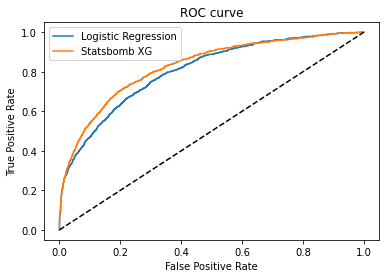

In [40]:
#Plotting a roc curve with train data
fpr, tpr, thresholds = roc_curve(y_train, y_train_probability)
fpr_statsbomb, tpr_statsbomb, thresholds = roc_curve(y_train, statsbomb_xg_train)

plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot(fpr_statsbomb, tpr_statsbomb, label='Statsbomb XG')

plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [41]:
y_test_probability = lr_model.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'True Positive Rate')

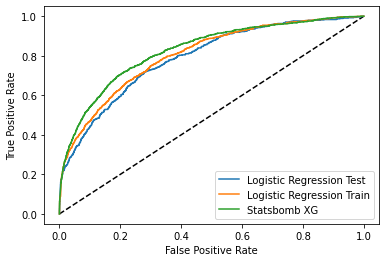

In [42]:
#plot a roc curve with train and test data 

fpr_test, tpr_test, thresholds = roc_curve(y_test, y_test_probability)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_test, tpr_test, label='Logistic Regression Test')
plt.plot(fpr, tpr, label='Logistic Regression Train')
plt.plot(fpr_statsbomb, tpr_statsbomb, label='Statsbomb XG')


plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')